In [84]:
import openclean
import glob
import pandas as pd
import numpy as np


In [85]:
# https://data.cityofnewyork.us/Housing-Development/Housing-New-York-Units-by-Building/hg8x-zxpr
# https://data.cityofnewyork.us/Housing-Development/DOB-NOW-Build-Approved-Permits/rbx6-tga4
# https://data.cityofnewyork.us/Housing-Development/Buildings-Selected-for-the-Alternative-Enforcement/hcir-3275

# Data Downloading

Download the data using openClean

In [86]:
import gzip
import humanfriendly
import os

from openclean.data.source.socrata import Socrata

dataset = Socrata().dataset('hcir-3275')
datafile = './hcir-3275.tsv.gz'

if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)


fsize = humanfriendly.format_size(os.stat(datafile).st_size)
print("Using '{}' in file {} of size {}".format(dataset.name, datafile, fsize))

Using 'Buildings Selected for the Alternative Enforcement Program (AEP)' in file ./hcir-3275.tsv.gz of size 148.46 KB


# Data Loading

Load the data into pandas and openClean dataset object

In [87]:
import pandas as pd
from openclean.pipeline import stream

df  = pd.read_csv(datafile, dtype='object', sep='\t')
ds = stream(datafile)

In [88]:
np.__version__

'1.18.5'

In [89]:
pd.__version__

'1.2.4'

In [90]:
import glob

In [91]:
glob.glob("*")

['Buildings-Selected-for-the-Alternative-Enforcement-hcir-3275.ipynb',
 'DOB-NOW-Build-Approved-Permits-rbx6-tga4.ipynb',
 'hcir-3275.tsv.gz',
 'hcir-3275_cleaned_data.csv',
 'hg8x-zxpr.tsv.gz',
 'hg8x-zxpr_cleaned_data.csv',
 'Housing-New-York-Units-by-Building-hg8x-zxpr.ipynb',
 'ic3t-wcy2.tsv.gz',
 'rbx6-tga4.tsv.gz',
 'rbx6-tga4_cleaned_data.csv',
 'Untitled.ipynb']

### Get some basic info about the dataset columns

In [92]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   BUILDING_ID                   3137 non-null   object
 1   BOROUGH                       3137 non-null   object
 2   NUMBER                        3137 non-null   object
 3   STREET                        3137 non-null   object
 4   TOTAL_UNITS                   3137 non-null   object
 5   AEP_START_DATE                3137 non-null   object
 6   # OF B/C VIOLATIONS AT START  3137 non-null   object
 7   CURRENT_STATUS                3137 non-null   object
 8   DISCHARGE_DATE                2619 non-null   object
 9   AEP_ROUND                     3137 non-null   object
 10  Postcode                      3137 non-null   object
 11  Latitude                      3137 non-null   object
 12  Longitude                     3137 non-null   object
 13  Community Board   

<ipython-input-92-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


If any rows are complete duplicates, drop them

In [93]:
df = df.drop_duplicates()

Take an a look at some of the rows to get an idea of what the datset looks like

In [94]:
df

,BUILDING_ID,BOROUGH,NUMBER,STREET,TOTAL_UNITS,AEP_START_DATE,# OF B/C VIOLATIONS AT START,CURRENT_STATUS,DISCHARGE_DATE,AEP_ROUND,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,118921,Bronx,2739,WALLACE AVENUE,4,01/31/2011,280,AEP Discharged,11/08/2018,Aep Round 4,10467,40.866157,-73.864449,11,15,338,2053681,2045110043,Bronxdale
1,338100,Brooklyn,738,MILLER AVENUE,6,01/31/2020,156,AEP Discharged,10/23/2020,Aep Round 13,11207,40.662484,-73.888169,5,42,1122,3096710,3043030027,East New York (Pennsylvania Ave)
2,354272,Brooklyn,2488,PITKIN AVENUE,3,02/02/2015,328,AEP Discharged,10/05/2015,Aep Round 8,11208,40.674161,-73.880485,5,37,1166,3089314,3040210019,East New York
3,148503,Brooklyn,1366,40 STREET,6,01/31/2014,66,AEP Discharged,04/23/2014,Aep Round 7,11218,40.639235,-73.985515,12,39,230,3123252,3052970033,Borough Park
4,309707,Brooklyn,173,HEMLOCK STREET,4,01/31/2014,130,AEP Discharged,06/12/2015,Aep Round 7,11208,40.685633,-73.871577,5,37,1184,3092361,3041320030,Cypress Hills-City Line
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,27560,Manhattan,88,SEAMAN AVENUE,32,02/02/2015,536,AEP Discharged,06/09/2015,Aep Round 8,10034,40.868156,-73.924905,12,10,295,1065068,1022480028,Marble Hill-Inwood
3133,6257,Manhattan,440,AUDUBON AVENUE,68,01/31/2011,1983,AEP Discharged,06/28/2011,Aep Round 4,10040,40.852574,-73.929545,12,10,269,1063813,1021580016,Washington Heights North
3134,326015,Brooklyn,568,LINCOLN AVENUE,3,01/31/2020,422,AEP Active,NaN,Aep Round 13,11208,40.675365,-73.867137,5,42,1200,3095200,3042370026,East New York
3135,65814,Bronx,265,EAST 176 STREET,21,02/01/2016,1398,AEP Discharged,11/09/2016,Aep Round 9,10457,40.847382,-73.904373,5,15,23302,2007568,2028020044,Mount Hope


In [95]:
df.columns

Index(['BUILDING_ID', 'BOROUGH', 'NUMBER', 'STREET', 'TOTAL_UNITS',
       'AEP_START_DATE', '# OF B/C VIOLATIONS AT START', 'CURRENT_STATUS',
       'DISCHARGE_DATE', 'AEP_ROUND', 'Postcode', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

## Renaming columns

In [96]:
df = df.rename(columns={
                          "BUILDING_ID": "Building ID" 
                        , "BOROUGH": "Borough"
                        , "NUMBER": "Number"
                        , "STREET": "Street"
                        , "TOTAL_UNITS": "Total Units"
                        , "AEP_START_DATE": "AEP Start Date"
                        , "Job Status Descrp": "Job Status Description"
                        , "# OF B/C VIOLATIONS AT START": "# of B/C Violations At Start"
                        , "CURRENT_STATUS": "Current Status"
                        , "DISCHARGE_DATE": "Discharge Date"
                        , "AEP_ROUND": "AEP Round"
                       })

#### Method to get an idea of the top 10 values of a column

In [97]:
def show_vals(column_name, show_rows=10, df=df):
    print("Top {} {}:\n".format(show_rows, column_name))
    print(df[column_name].value_counts(dropna=False)[:show_rows])
    print()

In [98]:
df.columns

Index(['Building ID', 'Borough', 'Number', 'Street', 'Total Units',
       'AEP Start Date', '# of B/C Violations At Start', 'Current Status',
       'Discharge Date', 'AEP Round', 'Postcode', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

### Examining Latitude and Longitude 

Group by Job # and check if latitude and longitude are the same all the same for the job, which would indicate different instances of the Job # all refer to the same Job.

In [99]:
group = df[['Building ID', 'Latitude', 'Longitude']].groupby('Building ID')

This will take a little while to run

In [100]:
tranformed = group.aggregate(lambda x: x.unique().shape[0])

Jobs with multiple latitude and longitudes:

In [101]:
# 107 potential bad jobs
tranformed.loc[(tranformed['Latitude']!=1)
              |(tranformed['Longitude']!=1)]

,Latitude,Longitude
Building ID,,


In [102]:
potential_bad_jobs = list(tranformed.loc[(tranformed['Latitude']!=1)
              |(tranformed['Longitude']!=1)].index.unique())

Separate these into a temporary dataframe to play around with:

In [103]:
df_temp = df.loc[df['Building ID'].isin(potential_bad_jobs)].copy()

In [104]:
df_temp = df_temp.sort_values(['Building ID', 'Latitude', 'Longitude'])

Most of these are just missing lat and long values.

The others look to be Jobs that manage multiple houses/lots in a small area, so are probably correct

In [105]:
df_temp[df_temp.duplicated(subset=['Building ID', 'BBL', 'BIN', 'NTA'], keep=False)]

,Building ID,Borough,Number,Street,Total Units,AEP Start Date,# of B/C Violations At Start,Current Status,Discharge Date,AEP Round,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA


#### Later, after we have cleaned more values, we will fill these missing values by job #

Remove Jobs we know to be just missing data from the list of bad jobs

In [106]:
not_bad_jobs = df_temp[df_temp.duplicated(subset=['Building ID', 'BBL', 'BIN', 'NTA'], keep=False)]['Building ID'].unique()

In [107]:
df_temp = df_temp.loc[~df_temp['Building ID'].isin(not_bad_jobs)]

All of these are jobs that handle multiple lots or House #s, which explains why the lat/long change 

Job # 122171130 and 122222638 may be exact copies of each other though

In [108]:
df_temp

,Building ID,Borough,Number,Street,Total Units,AEP Start Date,# of B/C Violations At Start,Current Status,Discharge Date,AEP Round,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA


Latest action date is different, so its probably differnt but very similar jobs 

In [109]:
df_temp[df_temp.columns[0:20]]


,Building ID,Borough,Number,Street,Total Units,AEP Start Date,# of B/C Violations At Start,Current Status,Discharge Date,AEP Round,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA


Check if any Job #s have non-digit values

In [110]:
df['Building ID'] = df['Building ID'].astype('str')

In [111]:
df.loc[(~df['Building ID'].isna())
       &(~df['Building ID'].str.isdigit())]['Building ID']

Series([], Name: Building ID, dtype: object)

All Job #s entirely composed of digits, so we cast them to ints

In [112]:
df['Building ID'] = df['Building ID'].astype('int')

In [113]:
df['Building ID'].describe()

count      3136.000000
mean     241289.808355
std      198353.066514
min         272.000000
25%       69918.250000
50%      225238.000000
75%      345849.250000
max      949009.000000
Name: Building ID, dtype: float64

## Examining and reparing house #s

House #'s appear to be mostly ints

However, there are legitimate house numbers with dashes so we'll have to make them strings

In [114]:
show_vals('Number', show_rows=10)

Top 10 Number:

20     11
180    10
304     9
541     8
257     8
234     8
561     7
509     7
315     7
473     7
Name: Number, dtype: int64



Replace NaN values with empty strings, then convert column to string, and make everything uppercase


In [115]:
df['Number'].fillna('', inplace=True)
df['Number'] = df['Number'].astype('str')
df['Number'] = df['Number'].str.upper()

Check for numbers spelled out as words

In [116]:
df.loc[(~df['Number'].isna())
       &(df['Number'].str.isalpha())]['Number']

Series([], Name: Number, dtype: object)

Check if thses are empty strings:

In [117]:
df.loc[(~df['Number'].str.contains('\\d', regex=True))]['Number']

Series([], Name: Number, dtype: object)

Most of these will probably be legitimate house numbers, since house numbers can have dashes

In [118]:
df.loc[(~df['Number'].isna())
       &(~df['Number'].str.isdigit())]['Number']

6           39-06
17          2156A
24          28-02
33      720 FRONT
47          20-10
          ...    
2861       144-03
3016        18-06
3078        18-14
3095       158-17
3127       108-42
Name: Number, Length: 139, dtype: object

Check non-numeric house #'s that don't have dashes

In [119]:
df.loc[(~df['Number'].isna())
       &(~df['Number'].str.isdigit())
      &(~df['Number'].str.contains('-', regex=False))]['Number'][:25]

17          2156A
33      720 FRONT
169           21A
182         3043A
417          997A
460     720 FRONT
483          268A
744          684B
825     720 FRONT
1001         997A
1014     508 REAR
1216        3043B
1226         240A
1726      501 1/2
1868         560A
2117          78A
2160        2011A
2222         274A
Name: Number, dtype: object

We see a mix of reference to the house's garage, the rear house and single letters that likely indicate apartments in multi-occupancy venues. 

We will standardize the formatting, and maintain the reference to garage, rear, and appartment, since there is no apartment column for the job.

First split the numbers and words with a space

In [120]:
df['Number'] = df['Number'].str.replace(pat='(?P<one>\\d)(?P<two>[A-Z]+)', repl='\g<one> \g<two>', regex=True)

Now we will fix the formatting for garage and 
remove references to north, south, east, west, since they should be in street #

In [121]:
df['Number'] = df['Number'].str.replace(pat='(?P<one>GAR$)', repl='GARAGE', regex=True)

In [122]:
df['Number'] = df['Number'].str.replace(pat='NORTH([A-Z]+)?', repl='', regex=True)
df['Number'] = df['Number'].str.replace(pat='EAST([A-Z]+)?', repl='', regex=True)
df['Number'] = df['Number'].str.replace(pat='SOUTH([A-Z]+)?', repl='', regex=True)
df['Number'] = df['Number'].str.replace(pat='WEST([A-Z]+)?', repl='', regex=True)

In [123]:
# Confirm that it worked correctly:
df.loc[(~df['Number'].isna())
       &(~df['Number'].str.isdigit())
       &(~df['Number'].str.contains('-', regex=False))]['Number'][:30]

17         2156 A
33      720 FRONT
169          21 A
182        3043 A
417         997 A
460     720 FRONT
483         268 A
744         684 B
825     720 FRONT
1001        997 A
1014     508 REAR
1216       3043 B
1226        240 A
1726      501 1/2
1868        560 A
2117         78 A
2160       2011 A
2222        274 A
Name: Number, dtype: object

For unclear reasons, adding xticks makes this plot incredibly slow to display.

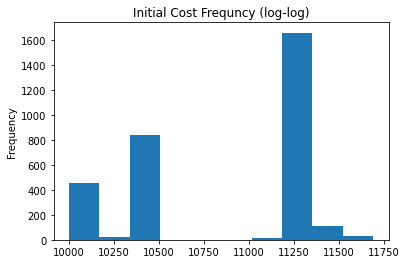

In [124]:
df["Postcode"].astype('int').plot(kind='hist', loglog=False, title='Initial Cost Frequncy (log-log)')

Intial costs appear to be distributed roughly exponentially 

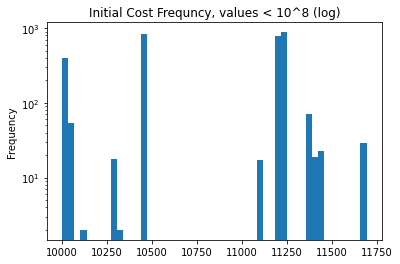

In [125]:
df.loc[df["Postcode"].astype('int')<10**8]["Postcode"].astype('int').plot(kind='hist', logy=True, bins=50, title='Initial Cost Frequncy, values < 10^8 (log)')

In [126]:
df["Borough"].value_counts()

Brooklyn         1660
Bronx             835
Manhattan         462
Queens            159
Staten Island      20
Name: Borough, dtype: int64

Since the states can be outside NYC, these are probably fine

In [127]:
df["Total Units"].value_counts()

3      535
6      523
4      272
8      259
16     136
      ... 
71       1
104      1
105      1
64       1
63       1
Name: Total Units, Length: 88, dtype: int64

### Checking additional numerical columns for coherency

In [128]:
numerical_columns = ['# of B/C Violations At Start',
       'Community Board', 'Council District', 'Census Tract']

Try to convert these all to numeric values

In [129]:
for col in numerical_columns:
    df[col] = df[col].astype('str')

In [130]:
for col in numerical_columns:
    print(col)
    print(df.loc[(~df[col].str.isdigit())
      &(df[col]!='nan')][col])
    print()

# of B/C Violations At Start
Series([], Name: # of B/C Violations At Start, dtype: object)

Community Board
Series([], Name: Community Board, dtype: object)

Council District
Series([], Name: Council District, dtype: object)

Census Tract
Series([], Name: Census Tract, dtype: object)



##### Try to convert to numerical values now:

In [131]:
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

In [132]:
for col in numerical_columns:
    show_vals(col)

Top 10 # of B/C Violations At Start:

445    13
143    11
149    11
237    10
271    10
167    10
97      9
121     9
111     9
154     9
Name: # of B/C Violations At Start, dtype: int64

Top 10 Community Board:

4     417
3     400
5     347
12    289
9     286
8     179
16    175
17    163
7     160
6     143
Name: Community Board, dtype: int64

Top 10 Council District:

37    335
36    272
41    250
17    181
15    167
42    163
34    137
16    131
7     127
35    118
Name: Council District, dtype: int64

Top 10 Census Tract:

369    33
437    29
373    28
431    28
353    28
379    27
245    26
429    25
269    24
271    24
Name: Census Tract, dtype: int64



## Quick look at GIS

In [133]:
show_vals("Latitude")
show_vals("Longitude")
show_vals("BIN")

Top 10 Latitude:

40.873363    4
40.676487    4
40.655593    4
40.692798    4
40.881161    3
40.832562    3
40.823974    3
40.8498      3
40.656775    3
40.671118    3
Name: Latitude, dtype: int64

Top 10 Longitude:

-73.922322    4
-73.891052    4
-73.900622    4
-73.91808     4
-73.95055     3
-73.862331    3
-73.979062    3
-73.926181    3
-73.908071    3
-73.894263    3
Name: Longitude, dtype: int64

Top 10 BIN:

3075861    4
3102567    4
2015418    4
NaN        3
3045921    3
3118210    3
2010121    3
1061845    3
3080019    3
3041003    3
Name: BIN, dtype: int64



In [134]:
#Manually looking at some of these
df[["Latitude", "Longitude",  "BIN"]]

,Latitude,Longitude,BIN
0,40.866157,-73.864449,2053681
1,40.662484,-73.888169,3096710
2,40.674161,-73.880485,3089314
3,40.639235,-73.985515,3123252
4,40.685633,-73.871577,3092361
...,...,...,...
3132,40.868156,-73.924905,1065068
3133,40.852574,-73.929545,1063813
3134,40.675365,-73.867137,3095200
3135,40.847382,-73.904373,2007568


In [135]:
#shouldn't be 0
df["Latitude"] = df["Latitude"].astype('float')
df["Latitude"].min()

40.576105

In [136]:
df["Latitude"].max()

40.906152

In [137]:
df.loc[df["Latitude"] == 0.0]

,Building ID,Borough,Number,Street,Total Units,AEP Start Date,# of B/C Violations At Start,Current Status,Discharge Date,AEP Round,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA


#### Removed the the rows above because its obviously a filler job

In [138]:
df = df.drop(df[df["Latitude"] == 0.0].index)

In [139]:
df["Latitude"].min()

40.576105

#### The min and max makes sense as the values range from Staten Island to the Bronx

In [140]:
df["Longitude"] = df["Longitude"].astype('float')
df["Longitude"].min()

-74.159977

In [141]:
df["Longitude"].max()

-73.734376

In [142]:
df.loc[df["Longitude"] == -74.159977]

,Building ID,Borough,Number,Street,Total Units,AEP Start Date,# of B/C Violations At Start,Current Status,Discharge Date,AEP Round,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
757,753007,Staten Island,20,LAMBERT STREET,16,01/31/2011,277,AEP Discharged,07/13/2011,Aep Round 4,10314,40.618162,-74.159977,1,49,30301,5032096,5016410012,Mariner's Harbor-Arlington-Port Ivory-Granitev...


#### These longitudes and latitudes range from Queens to Staten Island which is also consistent with our dataset

In [143]:
df["BIN"] = df["BIN"].astype('float')
df["BIN"].min()

1001047.0

In [144]:
df["BIN"] = df["BIN"].astype('float')
df["BIN"].max()

5142323.0

In [145]:
df.loc[df["BIN"] == 1001047.0]

,Building ID,Borough,Number,Street,Total Units,AEP Start Date,# of B/C Violations At Start,Current Status,Discharge Date,AEP Round,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
1514,29251,Manhattan,109,WASHINGTON STREET,16,01/31/2018,204,AEP Active,NaN,Aep Round 11,10006,40.708623,-74.014218,1,1,13,1001047.0,1000530006,Battery Park City-Lower Manhattan


In [146]:
df.loc[df["BIN"] == 5142323.0]

,Building ID,Borough,Number,Street,Total Units,AEP Start Date,# of B/C Violations At Start,Current Status,Discharge Date,AEP Round,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
2175,720974,Staten Island,40,CASSIDY PLACE,3,01/31/2017,40,AEP Active,NaN,Aep Round 10,10301,40.642329,-74.093492,1,49,81,5142323.0,5000650033,West New Brighton-New Brighton-St. George


#### Nothing wrong with GIS BIN either

# Data Profilling for datetime columns


Find format problems and outliers in all datetime columns

Using openclean's sklearn modules to detect problems and outliers

In [147]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

def findDateOutliers(column_name, eps_setting = 0.05):
    datetime_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(datetime_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(datetime_data)))
    print(DBSCANOutliers().find(datetime_data))
    print(DBSCANOutliers(eps = eps_setting).find(datetime_data))
    print('\n==================================')

In [148]:
date_cols = []

print("Datetime Data columns:\n")
for col in ds.columns:
    if 'Date' in col or 'DATE' in col:
        print(col)
        date_cols.append(col)

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.02)

Datetime Data columns:

AEP_START_DATE
DISCHARGE_DATE
----------------------------

Column:  AEP_START_DATE
1.  01/31/2020         250
2.  02/02/2015         250
3.  01/31/2019         250
4.  02/01/2021         250
5.  01/31/2018         250
6.  01/31/2017         250
7.  02/01/2016         250
8.  01/31/2011         200
9.  11/12/2009         200
10. 11/13/2008         200

Total number of distinct values in AEP_START_DATE is 14
[]
['02/01/2021', '01/31/2012', '01/31/2020', '01/31/2014', '02/02/2015', '11/13/2008', '11/13/2007', '11/12/2009', '01/31/2018', '01/31/2017', '02/01/2016', '01/31/2011', '01/31/2019', '01/31/2013']

Column:  DISCHARGE_DATE
1.                   518
2.  04/06/2011          34
3.  06/14/2016          15
4.  06/19/2018          13
5.  06/18/2015          12
6.  06/20/2013          11
7.  06/20/2012          11
8.  03/23/2011          11
9.  05/30/2013          11
10. 06/05/2018          10

Total number of distinct values in DISCHARGE_DATE is 1112
['']
['', '04

# No outliers found

## Fixing Datetime columns format

In [149]:
datetime_column_list = ['AEP Start Date', 'Discharge Date']
for col in datetime_column_list:
    show_vals(col)

Top 10 AEP Start Date:

01/31/2018    250
01/31/2020    250
01/31/2019    250
02/02/2015    250
02/01/2021    250
02/01/2016    250
01/31/2017    250
01/31/2013    200
01/31/2012    200
11/13/2008    200
Name: AEP Start Date, dtype: int64

Top 10 Discharge Date:

NaN           518
04/06/2011     34
06/14/2016     15
06/19/2018     13
06/18/2015     12
06/20/2013     11
06/20/2012     11
05/30/2013     11
03/23/2011     11
06/05/2018     10
Name: Discharge Date, dtype: int64



Check to see if any columns have values in year-month-day format

In [150]:
for col in datetime_column_list:
    print(col, '\n', df.loc[df[col].str.contains('-', regex=False, na=False)][col], '\n\n')

AEP Start Date 
 Series([], Name: AEP Start Date, dtype: object) 


Discharge Date 
 Series([], Name: Discharge Date, dtype: object) 




### Check the coherence of datetime values

These don't make sense, but it's not entirely clear if they should be swapped, or removed or what

In [151]:
df.loc[(df['AEP Start Date'] > df['Discharge Date'])
      &(~df['AEP Start Date'].isna() & ~df['Discharge Date'].isna())][['AEP Start Date', 'Discharge Date']]

,AEP Start Date,Discharge Date
5,11/12/2009,03/26/2010
9,11/13/2008,03/19/2009
14,01/31/2011,01/07/2016
16,11/13/2008,03/08/2013
18,11/13/2007,05/07/2012
...,...,...
3113,01/31/2014,01/12/2021
3117,11/13/2007,02/13/2012
3120,11/12/2009,05/21/2010
3121,11/12/2009,04/06/2010


##### These are, however a small percentage of of our total jobs

Fraction of jobs Assigned after they were already approved out of total jobs

In [152]:
df.loc[df['AEP Start Date'] > df['Discharge Date']]['Discharge Date'].count()/df['Discharge Date'].count()

0.22307104660045837

# Data Profilling for City and Other Description

Find format problems and outliers in City and Description columns

Using openclean's sklearn modules to detect problems and outliers

In [153]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [154]:
date_cols = ["BOROUGH"]

In [155]:

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

----------------------------

Column:  BOROUGH
1.  Brooklyn       1,661
2.     Bronx         835
3.  Manhattan         462
4.    Queens         159
5.  Staten Island          20

Total number of distinct values in BOROUGH is 5
['Staten Island', 'Bronx', 'Manhattan', 'Brooklyn', 'Queens']



# Analysis

the above results show the problems for the data cleaning task:
    
### For BOROUGH

There are many misspellings and abbreviations for city names. We can use both clustering and Soundex to detect misspellings and abbreviations. And we can check if our cleaning is right by refer to the U.S. Cities reference datasets in openclean.

In [156]:
from openclean.function.eval.base import Col, Eval
from openclean.function.eval.logic import And
from openclean.function.value.phonetic import Soundex, soundex

In [157]:
upper = ds\
    .select('BOROUGH')\
    .update('BOROUGH', str.upper)

In [158]:
from openclean.data.refdata import RefStore

refdata = RefStore()
city_df = refdata\
    .load('encyclopaedia_britannica:us_cities', auto_download=True)\
    .df()


In [159]:
city_list = city_df['city']
print(city_list)

0          Demopolis
1          Sylacauga
2               Troy
3             Dothan
4           Prichard
            ...     
1956          Powell
1957        Riverton
1958        Sheridan
1959    Rock Springs
1960         Buffalo
Name: city, Length: 1961, dtype: object


# An example of using soundex in openclean

However, using soundex for each of the city is too slow, the code below take nearly 4 mins for one sningle city.\
So we should use clustering first and then use hard code to clean the remianing city name that is not in the city_list.

In [160]:
brooklyn = ds\
    .select('BOROUGH')\
    .update('BOROUGH', str.upper)\
    .filter(And(Eval('BOROUGH', Soundex()) == soundex('BROOKLYN'), Col('BOROUGH') != 'BROOKLYN'))\
    .distinct()

print('RANK\tCOUNT\tNAME')
for i, entry in enumerate(brooklyn.most_common()):
    key, count = entry
    print('{}.\t{}\t{}'.format(i + 1, count, key))

RANK	COUNT	NAME


# Check State Column

In [161]:
state_col = 'STREET'
findDateOutliers(state_col, 0.1)

Column:  STREET
1.  AMSTERDAM AVENUE          30
2.  HANCOCK STREET          27
3.  GREENE AVENUE          25
4.  ST NICHOLAS AVENUE          23
5.  FULTON STREET          22
6.  HALSEY STREET          22
7.  4 AVENUE          21
8.  LINDEN BOULEVARD          20
9.  EASTERN PARKWAY          20
10. ST JOHNS PLACE          20

Total number of distinct values in STREET is 937
['ST MARKS AVENUE', 'AVENUE S', 'AVENUE F', 'GREENE AVENUE', 'PARK PLACE', 'MT HOPE PLACE', 'AVENUE I', 'BERGEN STREET', 'FAIRMOUNT PLACE', 'HART STREET', 'CONEY ISLAND AVENUE', 'RIVERSIDE DRIVE', '136 ROAD', 'WHITE PLAINS ROAD', 'AMSTERDAM AVENUE', 'HALSEY STREET', 'MOTHER GASTON BOULEVARD', 'MAC DONOUGH STREET', 'PENNSYLVANIA AVENUE', 'AVENUE D', 'EASTERN PARKWAY EXTENSION', 'OCEAN AVENUE', 'DR M L KING JR BOULEVARD', 'ST NICHOLAS AVENUE', 'CLAY AVENUE', 'KNICKERBOCKER AVENUE', 'DE KALB AVENUE', 'FREDERICK DOUGLASS BOULEVARD', 'LENOX ROAD', 'ADAM C POWELL BOULEVARD', '3 AVENUE', '3 PLACE', 'ST JOHNS PLACE', 'AVENUE

In [162]:
ds.select('STREET').distinct()

Counter({'WALLACE AVENUE': 6,
         'MILLER AVENUE': 17,
         'PITKIN AVENUE': 11,
         '40 STREET': 3,
         'HEMLOCK STREET': 2,
         'BROOKLYN AVENUE': 2,
         '114 STREET': 1,
         'PROSPECT AVENUE': 19,
         'FINDLAY AVENUE': 9,
         'WALWORTH STREET': 1,
         'LINCOLN PLACE': 11,
         'LINDEN BOULEVARD': 20,
         '4 AVENUE': 21,
         'IRVING AVENUE': 11,
         'SPENCER COURT': 1,
         'LOCUST STREET': 2,
         'BRONX RIVER AVENUE': 2,
         'FULTON STREET': 22,
         'LELAND AVENUE': 9,
         'MAC DONOUGH STREET': 10,
         'EAST 135 STREET': 1,
         'MALCOLM X BOULEVARD': 5,
         'SUMPTER STREET': 9,
         'HULL STREET': 11,
         '44 STREET': 2,
         'HERKIMER STREET': 10,
         'PRESIDENT STREET': 8,
         'HENRY STREET': 2,
         'HAWTHORNE STREET': 3,
         'EAST 96 STREET': 10,
         'EAST 216 STREET': 4,
         'LINCOLN AVENUE': 7,
         'QUINCY STREET': 13,
      

In [163]:
outputpath = datafile[2:11]+'_cleaned_data.csv'
df.to_csv(outputpath,sep=',',index=False,header=True) 

# Precision and Recall

In [179]:
df2  = pd.read_csv(datafile, dtype='object', sep='\t')

sample_size = 100

df_sample_data =  df2.sample(sample_size).copy()

In [180]:
df_sample_data = df.rename(columns={
                          "BUILDING_ID": "Building ID" 
                        , "BOROUGH": "Borough"
                        , "NUMBER": "Number"
                        , "STREET": "Street"
                        , "TOTAL_UNITS": "Total Units"
                        , "AEP_START_DATE": "AEP Start Date"
                        , "Job Status Descrp": "Job Status Description"
                        , "# OF B/C VIOLATIONS AT START": "# of B/C Violations At Start"
                        , "CURRENT_STATUS": "Current Status"
                        , "DISCHARGE_DATE": "Discharge Date"
                        , "AEP_ROUND": "AEP Round"
                       })

In [181]:
df_sample_data

,Building ID,Borough,Number,Street,Total Units,AEP Start Date,# of B/C Violations At Start,Current Status,Discharge Date,AEP Round,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,118921,Bronx,2739,WALLACE AVENUE,4,01/31/2011,280,AEP Discharged,11/08/2018,Aep Round 4,10467,40.866157,-73.864449,11,15,338,2053681.0,2045110043,Bronxdale
1,338100,Brooklyn,738,MILLER AVENUE,6,01/31/2020,156,AEP Discharged,10/23/2020,Aep Round 13,11207,40.662484,-73.888169,5,42,1122,3096710.0,3043030027,East New York (Pennsylvania Ave)
2,354272,Brooklyn,2488,PITKIN AVENUE,3,02/02/2015,328,AEP Discharged,10/05/2015,Aep Round 8,11208,40.674161,-73.880485,5,37,1166,3089314.0,3040210019,East New York
3,148503,Brooklyn,1366,40 STREET,6,01/31/2014,66,AEP Discharged,04/23/2014,Aep Round 7,11218,40.639235,-73.985515,12,39,230,3123252.0,3052970033,Borough Park
4,309707,Brooklyn,173,HEMLOCK STREET,4,01/31/2014,130,AEP Discharged,06/12/2015,Aep Round 7,11208,40.685633,-73.871577,5,37,1184,3092361.0,3041320030,Cypress Hills-City Line
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,27560,Manhattan,88,SEAMAN AVENUE,32,02/02/2015,536,AEP Discharged,06/09/2015,Aep Round 8,10034,40.868156,-73.924905,12,10,295,1065068.0,1022480028,Marble Hill-Inwood
3133,6257,Manhattan,440,AUDUBON AVENUE,68,01/31/2011,1983,AEP Discharged,06/28/2011,Aep Round 4,10040,40.852574,-73.929545,12,10,269,1063813.0,1021580016,Washington Heights North
3134,326015,Brooklyn,568,LINCOLN AVENUE,3,01/31/2020,422,AEP Active,NaN,Aep Round 13,11208,40.675365,-73.867137,5,42,1200,3095200.0,3042370026,East New York
3135,65814,Bronx,265,EAST 176 STREET,21,02/01/2016,1398,AEP Discharged,11/09/2016,Aep Round 9,10457,40.847382,-73.904373,5,15,23302,2007568.0,2028020044,Mount Hope


In [182]:
cleaned_columns = ['Building ID', 'Latitude', 'Longitude','Number',"Postcode",'# of B/C Violations At Start',
       'Community Board', 'Council District', 'Census Tract','AEP Start Date','Discharge Date',"Borough",'Street']

In [183]:
df_sample_data = df_sample_data[cleaned_columns]

In [184]:
def precision(tp, fp):
    return tp/(tp+fp)

def recall(tp, fn):
    return tp/(tp+fn)

In [187]:
print('sample size: ',sample_size)
print('======================\n\n')

same = 0

for col in cleaned_columns:
    print("column: ", col)
    print("Original,\t Cleaned\n")
    for i in range(sample_size):
        if df_sample_data[col].iloc[i]== df[col].iloc[i]:
            same += 1
        else:
            print(df_sample_data[col].iloc[i], '\t', df[col].iloc[i], '\t*')
    
    print('.......', same, ' same records ......\n')
    same = 0
    
    print('======================\n\n')

sample size:  100


column:  Building ID
Original,	 Cleaned

....... 100  same records ......



column:  Latitude
Original,	 Cleaned

....... 100  same records ......



column:  Longitude
Original,	 Cleaned

....... 100  same records ......



column:  Number
Original,	 Cleaned

....... 100  same records ......



column:  Postcode
Original,	 Cleaned

....... 100  same records ......



column:  # of B/C Violations At Start
Original,	 Cleaned

....... 100  same records ......



column:  Community Board
Original,	 Cleaned

....... 100  same records ......



column:  Council District
Original,	 Cleaned

....... 100  same records ......



column:  Census Tract
Original,	 Cleaned

....... 100  same records ......



column:  AEP Start Date
Original,	 Cleaned

....... 100  same records ......



column:  Discharge Date
Original,	 Cleaned

nan 	 nan 	*
nan 	 nan 	*
nan 	 nan 	*
nan 	 nan 	*
nan 	 nan 	*
nan 	 nan 	*
nan 	 nan 	*
....... 93  same records ......



column:  Borough
Origin

In [188]:
print('sample size: ',sample_size)
print('======================\n\n')

same = 0

for col in cleaned_columns:
    print("column: ", col)
    print("Original,\t Cleaned\n")
    for i in range(sample_size):
        if df_sample_data[col].iloc[i]== df[col].iloc[i]:
            print(df_sample_data[col].iloc[i], '\t', df[col].iloc[i], '\t')
        else:
            print(df_sample_data[col].iloc[i], '\t', df[col].iloc[i], '\t*')

    print('======================\n\n')

sample size:  100


column:  Building ID
Original,	 Cleaned

118921 	 118921 	
338100 	 338100 	
354272 	 354272 	
148503 	 148503 	
309707 	 309707 	
214801 	 214801 	
527226 	 527226 	
104592 	 104592 	
78261 	 78261 	
387868 	 387868 	
326302 	 326302 	
327115 	 327115 	
129406 	 129406 	
315762 	 315762 	
373055 	 373055 	
328321 	 328321 	
52173 	 52173 	
297806 	 297806 	
91605 	 91605 	
334920 	 334920 	
62596 	 62596 	
360479 	 360479 	
379420 	 379420 	
314816 	 314816 	
432731 	 432731 	
311297 	 311297 	
355491 	 355491 	
129403 	 129403 	
327191 	 327191 	
22678 	 22678 	
309399 	 309399 	
337955 	 337955 	
284464 	 284464 	
68350 	 68350 	
325837 	 325837 	
359235 	 359235 	
298165 	 298165 	
768885 	 768885 	
166224 	 166224 	
145007 	 145007 	
297483 	 297483 	
342514 	 342514 	
371699 	 371699 	
288090 	 288090 	
320847 	 320847 	
394455 	 394455 	
222650 	 222650 	
535348 	 535348 	
332612 	 332612 	
380440 	 380440 	
949009 	 949009 	
373589 	 373589 	
358622 	 358622

37 	 37 	
35 	 35 	
36 	 36 	
47 	 47 	
36 	 36 	
19 	 19 	
36 	 36 	
34 	 34 	
12 	 12 	
35 	 35 	
41 	 41 	
37 	 37 	
41 	 41 	
9 	 9 	
36 	 36 	
15 	 15 	
37 	 37 	
35 	 35 	
18 	 18 	
17 	 17 	
35 	 35 	
7 	 7 	
48 	 48 	
41 	 41 	
37 	 37 	
38 	 38 	
36 	 36 	
14 	 14 	
35 	 35 	
41 	 41 	
41 	 41 	
15 	 15 	
8 	 8 	
28 	 28 	
37 	 37 	
37 	 37 	
7 	 7 	
16 	 16 	
36 	 36 	
16 	 16 	
17 	 17 	
8 	 8 	
15 	 15 	
48 	 48 	
37 	 37 	
37 	 37 	
41 	 41 	
37 	 37 	
15 	 15 	
41 	 41 	
37 	 37 	
16 	 16 	
15 	 15 	
7 	 7 	
28 	 28 	
7 	 7 	
17 	 17 	
37 	 37 	


column:  Census Tract
Original,	 Cleaned

338 	 338 	
1122 	 1122 	
1166 	 1166 	
230 	 230 	
1184 	 1184 	
337 	 337 	
399 	 399 	
12901 	 12901 	
175 	 175 	
241 	 241 	
351 	 351 	
820 	 820 	
72 	 72 	
443 	 443 	
241 	 241 	
389 	 389 	
56 	 56 	
369 	 369 	
21601 	 21601 	
373 	 373 	
25 	 25 	
295 	 295 	
379 	 379 	
369 	 369 	
147 	 147 	
369 	 369 	
351 	 351 	
72 	 72 	
820 	 820 	
6 	 6 	
87401 	 87401 	
1160 	 1160 

In [189]:
tp = 7
fp = 0

fn = 2
tn = 1300 - 9

In [190]:
precision(tp, fp)

1.0

In [191]:
recall(tp,fn)

0.7777777777777778